<a href="https://colab.research.google.com/github/hongqin/R-covid19-bootcamp-2020Dec/blob/main/R_coding_bootcamp_2020Dec19_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# First, please make a copy to your own Google Drive. 
**Please make a copy of this code in your CoLab in order to modify and run the code**. <br> 
**Please rename the file  as LastName-FirstName-R-coding-bootcamp-2020Dec19-23 so that teaching-assistants can help you** 
<br> 
You can do this by select "File" -> "Save a copy in Drive"

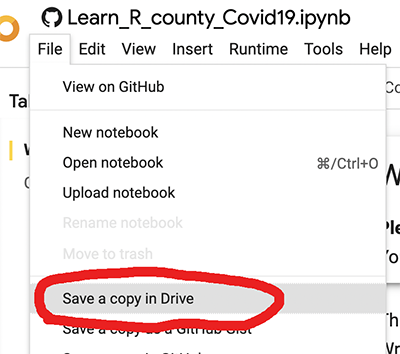



---



This is a short tutorial on using R to explore Covid19 data using Google CoLab <br>
Written by Hong Qin <br>
This version is modifed for a high-school coding bootcamp on Dec 19-23, 2020.

This is a work in progress and is for educational purpose only. 

This is code can be cloned from
https://github.com/hongqin/R-covid19-bootcamp-2020Dec/blob/main/R_coding_bootcamp_2020Dec19_23.ipynb

More tutorials at http://YouTube.com/hongqin

# Prepartion 1. Get familiar with Google CoLab

## The 'Code' and 'Text' cells
The code cell can be run by click the play icon on the upper-left corner of the code cells.

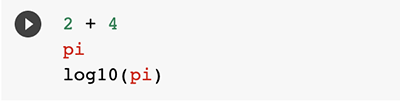

The menu on the top


## File, Edit, Insert, Runtime, Tools

## Table of contents and the left-sided panel

# Chapter 1. Basics of R coding

## What is R? 
It is a popular language for data analysis. See

https://en.wikipedia.org/wiki/R_(programming_language) 

There are many books on how to use R. This exercise is only meant to show some basics of R to you.

This Chapter took about 80 minutes on Dec 19, 2020

## Simple calculation

In [ ]:
2 + 5
pi
log10(pi)

[1] 7

[1] 3.141593

[1] 0.4971499

In [ ]:
2*3.14
9/2.5
9-5

[1] 6.28

[1] 3.6

[1] 4

## Use variables

The = sign means assignment in R and many other programming languages.

In [ ]:
x = 2 #assign 2 as a value to x
y = 3 #assign 3 as a value to y
z = x  + y
z

[1] 5

## The # sign means comments (not code)

In [ ]:
# We can add some inforamtive comments here
 x = 2 #This is also a comment. # is a good trick in coding to debugging. 
 x

[1] 2

## A list of numbers is called a Vector in R

In [ ]:
a_vector = c(1, 3.14159, 5.0, -1, 10) # c( ) is the syntax for defining a vector 
a_vector

[1]  1.00000  3.14159  5.00000 -1.00000 10.00000

In [ ]:
b_vector= a_vector + c(2, 0.5, -5, 1, -10)
b_vector

[1] 3.00000 3.64159 0.00000 0.00000 0.00000

In [ ]:
c_vector = a_vector + 10
c_vector

[1] 11.00000 13.14159 15.00000  9.00000 20.00000

## Vectors can be indexed. 


In [ ]:
a_vector = 4:20 #The colon sign is a symbol mean from 4 to 20
a_vector

[1]  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

In [ ]:
a_vector[1] #first element of the vector

[1] 4

In [ ]:
a_vector

[1]  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20

### **Question**: How to find the 9-th element? 

## Functions in R uses smooth parentheses

A function that generates a list of numbers from 4 to 100 with a step of 2

In [ ]:
seq(4, 100, 2) 

[1]   4   6   8  10  12  14  16  18  20  22  24  26  28  30  32  34  36  38  40
[20]  42  44  46  48  50  52  54  56  58  60  62  64  66  68  70  72  74  76  78
[39]  80  82  84  86  88  90  92  94  96  98 100

The function rnorm() generate random number based on Gaussian distribution


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.7378  -7.2149   0.2854   6.4804  22.9042 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept) -0.08637    1.01997  -0.085    0.933
x            1.26878    1.06449   1.192    0.236

Residual standard error: 10.15 on 98 degrees of freedom
Multiple R-squared:  0.01429,	Adjusted R-squared:  0.004231 
F-statistic: 1.421 on 1 and 98 DF,  p-value: 0.2362


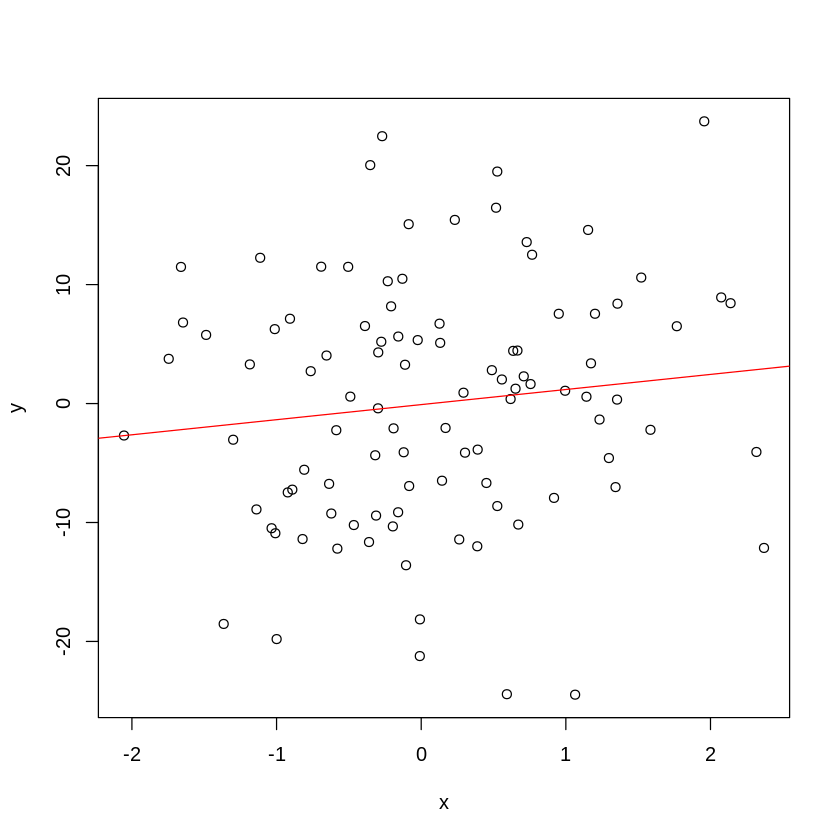

In [ ]:
x = rnorm(100) #generate 100 normal-distributed (Gaussian) random nubmers 
y = x + rnorm(100)*10 # y is a linear transformation of x with some Gaussain noise
m = lm( y ~ x) # linear regression, find a straight line between y and x
plot( y ~ x) #scatter plot
abline(m, col='red') #add a line 
summary(m) #reporting

## Looking for helps. 
This can be done by a question mark or help(). 

In [ ]:
?rnorm

In [ ]:
?lm

In [ ]:
?abline

In [ ]:
help(seq)

## Load Libraries
Libraries are software tools developed by many people around the world.

In [ ]:
library(tidyverse)
library(dplyr)

## Dataframe - the spreadsheet in R
Dataframe is a basic tool to handle data in R, in some ways like a spreadsheet in Microsoft Excel.

Now, let's load a small demo spreadsheet from a website

In [ ]:
tb = read_csv("https://raw.githubusercontent.com/hongqin/Use-R-in-CoLab/master/vip-grades.csv")


── Column specification ────────────────────────────────────────────────────────
cols(
  name = col_character(),
  GPA = col_double(),
  Major = col_character(),
  College = col_character()
)




In [ ]:
tb #look at the small table. Not a good idea for large table

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
John Adams,3.5,Computer_Science,Engineering
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
James Monroe,3.2,Economics,Business
Andrew Jackson,3.1,Chemistry,ArtsScience
James K. Polk,3.7,Data_Science,Engineering
Zachary Taylor,2.9,Environmental_Science,ArtsScience
Millard Fillmore,4.0,Biology,ArtsScience


In [ ]:
head(tb) #look at just a few row of the table

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
John Adams,3.5,Computer_Science,Engineering
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
James Monroe,3.2,Economics,Business
Andrew Jackson,3.1,Chemistry,ArtsScience


### pick rows and columns using indices

In [ ]:
tb[1,] #first row, value before a comma

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4,Biology,ArtsScience


In [ ]:
tb[, 2] #second column

GPA
<dbl>
4.0
3.5
3.9
4.0
3.2
3.1
3.7
2.9
4.0


In [ ]:
tb[2:3, 2:3] # 2nd, 3rd rows, 2nd and 3rd columns

GPA,Major
<dbl>,<chr>
3.5,Computer_Science
3.9,Physics


In [ ]:
tb[c(1,5,9), 1:2] # the 1st, 5th, and 9th rows, two columns

name,GPA
<chr>,<dbl>
George Washington,4.0
James Monroe,3.2
Millard Fillmore,4.0


### Pick a colum with $ or index

In [ ]:
tb$GPA

[1] 4.0 3.5 3.9 4.0 3.2 3.1 3.7 2.9 4.0 3.8 3.7 3.6 3.5 2.9 3.0 3.2 3.5 2.8 3.5
[20] 3.9 2.9 4.0 3.9 3.8 2.9 3.5 3.6 3.9

In [ ]:
tb[, 2]

GPA
<dbl>
4.0
3.5
3.9
4.0
3.2
3.1
3.7
2.9
4.0


### Pick a row 

In [ ]:
tb[1,]

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4,Biology,ArtsScience


### use fancy tidyverse

In [ ]:
tb %>% dplyr::select( name, GPA )  %>% filter (GPA >= 3.0)

name,GPA
<chr>,<dbl>
George Washington,4.0
John Adams,3.5
Thomas Jefferson,3.9
James Madison,4.0
James Monroe,3.2
Andrew Jackson,3.1
James K. Polk,3.7
Millard Fillmore,4.0
Franklin Pierce,3.8


In [ ]:
tb %>% dplyr::select( College ) %>% distinct #how many colleges are there? 

College
<chr>
ArtsScience
Engineering
Business


In [ ]:
tb %>% dplyr::filter (College == "ArtsScience")


name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
George Washington,4.0,Biology,ArtsScience
Thomas Jefferson,3.9,Physics,ArtsScience
James Madison,4.0,Mathematics,ArtsScience
Andrew Jackson,3.1,Chemistry,ArtsScience
Zachary Taylor,2.9,Environmental_Science,ArtsScience
Millard Fillmore,4.0,Biology,ArtsScience
Ulysses S. Grant,2.9,Political_Science,ArtsScience
Rutherford B. Hayes,3.0,Psychology,ArtsScience
James Garfield,3.2,Philosophy,ArtsScience


In [ ]:
tb %>% dplyr::filter (College == "Engineering")

name,GPA,Major,College
<chr>,<dbl>,<chr>,<chr>
John Adams,3.5,Computer_Science,Engineering
James K. Polk,3.7,Data_Science,Engineering
Franklin Pierce,3.8,Computer_Engineering,Engineering
James Buchanan,3.7,Electronic_Engineering,Engineering
Abraham Lincoln,3.6,Chemical_Engineering,Engineering
Chester A. Arthur,3.5,Computer_Science,Engineering
William McKinley,2.9,Computer_Science,Engineering
Herbert Hoover,3.6,Data_Science,Engineering
Franklin D. Roosevelt,3.9,Computer_Science,Engineering


### Question: Are GPA different between VIP students in Egnineering versus Art and Science? 

We can do a t-test. 

In [ ]:
tbEng = tb %>% dplyr::filter (College == "Engineering") 
tbAS = tb %>% dplyr:: filter (College == "ArtsScience")
t.test( tbEng$GPA, tbAS$GPA) # a t-test


	Welch Two Sample t-test

data:  tbEng$GPA and tbAS$GPA
t = 0.59723, df = 23.457, p-value = 0.5561
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2202747  0.3993597
sample estimates:
mean of x mean of y 
 3.577778  3.488235 


Generally, a p-value larger than 0.05 means no significant difference in the statistical sense. 

For more information on p-value, see 
https://en.wikipedia.org/wiki/P-value

## Stopped here on Dec 19, 2020 after ~ 1 hour and 20 minutes

# Preparation 2. The COVID19 open data


A popular source for reporting COVID cases is the site built by researchers at the John Hopkins University (JHU). This JHU data set is publically available and will be used in our study. 

There are many other COVID19 data set, see
https://en.wikipedia.org/wiki/COVID-19_datasets


# Chapter 2, Explore the USA county-level COVID19 case data


We will go through the COVID19 case data set and learn more R on the way. 



First, install and load some necessary packages

In [ ]:
packages <- c("reshape2")
install.packages(setdiff(packages, rownames(installed.packages()))) 
library(tidyverse)
library(lubridate)
library(reshape2)
library(ggplot2)
library(dplyr)

## Load the COVID19 data into a dataframe

In [ ]:
# load JHU covid19 data set with tidyverse read_csv
# this is the URL for "view raw " for csv files on GitHub
tb = read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")



── Column specification ────────────────────────────────────────────────────────
cols(
  .default = col_double(),
  iso2 = col_character(),
  iso3 = col_character(),
  Admin2 = col_character(),
  Province_State = col_character(),
  Country_Region = col_character(),
  Combined_Key = col_character()
)
ℹ Use `spec()` for the full column specifications.




In [ ]:
head(tb)

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,⋯,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,⋯,4239,4268,4305,4336,4546,4645,4705,4770,4847,4879
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,⋯,13823,13955,14064,14187,14440,14656,14845,15052,15202,15327
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,⋯,1517,1528,1530,1533,1575,1597,1614,1634,1648,1658
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,⋯,1854,1863,1882,1885,1923,1944,1981,2015,2038,2051
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,⋯,4693,4729,4746,4771,4849,4898,4957,5018,5047,5066
84001011,US,USA,840,1011,Bullock,Alabama,US,32.10031,-85.71266,⋯,888,892,900,910,920,925,927,949,950,953


## Pick rows, columns, and cells in DataFrames

A a_ij


In [ ]:
# pick first row, second colum
tb[1,2] 

# pick 4th row, 5th colum. Notice that R starts with 1, not zero like Python
tb[4, 5]

iso2
<chr>
US


FIPS
<dbl>
1007


In [ ]:
tb[6,6]

Admin2
<chr>
Bullock


In [ ]:
# pick first column and  first 10 rows
tb[ 1:10, 1]

UID
<dbl>
84001001
84001003
84001005
84001007
84001009
84001011
84001013
84001015
84001017


In [ ]:
# pick 6-7th rows, 4-8 colums
tb[ 6:7, 4:8]

code3,FIPS,Admin2,Province_State,Country_Region
<dbl>,<dbl>,<chr>,<chr>,<chr>
840,1011,Bullock,Alabama,US
840,1013,Butler,Alabama,US


In [ ]:
# The daily cases data started on the 12th column
tb[ 1:5, 1:12]

UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,Combined_Key,1/22/20
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>
84001001,US,USA,840,1001,Autauga,Alabama,US,32.53953,-86.64408,"Autauga, Alabama, US",0
84001003,US,USA,840,1003,Baldwin,Alabama,US,30.72775,-87.72207,"Baldwin, Alabama, US",0
84001005,US,USA,840,1005,Barbour,Alabama,US,31.86826,-85.38713,"Barbour, Alabama, US",0
84001007,US,USA,840,1007,Bibb,Alabama,US,32.99642,-87.12511,"Bibb, Alabama, US",0
84001009,US,USA,840,1009,Blount,Alabama,US,33.98211,-86.56791,"Blount, Alabama, US",0


In [ ]:
?length

In [ ]:
# how many columns? 
length(tb[1,])
print(paste( "There are ", length(tb[1,]), " columns"))

[1] 366

[1] "There are  366  columns"


In [ ]:
# view the first 5 rows in all data columns
tb[3000:3006 , 12: length(tb[1,])  ]

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,312,319,323,324,324,330,342,352,357,361
0,0,0,0,0,0,0,0,0,0,⋯,293,294,295,295,297,297,298,303,305,310
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,451,473,484,493,508,522,536,547,559,565
0,0,0,0,0,0,0,0,0,0,⋯,9,9,8,8,9,8,8,8,9,8
0,0,0,0,0,0,0,0,0,0,⋯,884,886,897,899,901,905,917,925,935,943
0,0,0,0,0,0,0,0,0,0,⋯,470,512,518,527,534,545,570,595,613,629


## Select columns of daily cases

select the all columns of actual data, from the 12 th column to the last column.

In [ ]:
tb %>% dplyr::select( 12:length(tb[1,]) ) #It seems that CoLab often rquire explicit pakcage for function calls. 

1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,⋯,1/1/21,1/2/21,1/3/21,1/4/21,1/5/21,1/6/21,1/7/21,1/8/21,1/9/21,1/10/21
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,⋯,4239,4268,4305,4336,4546,4645,4705,4770,4847,4879
0,0,0,0,0,0,0,0,0,0,⋯,13823,13955,14064,14187,14440,14656,14845,15052,15202,15327
0,0,0,0,0,0,0,0,0,0,⋯,1517,1528,1530,1533,1575,1597,1614,1634,1648,1658
0,0,0,0,0,0,0,0,0,0,⋯,1854,1863,1882,1885,1923,1944,1981,2015,2038,2051
0,0,0,0,0,0,0,0,0,0,⋯,4693,4729,4746,4771,4849,4898,4957,5018,5047,5066
0,0,0,0,0,0,0,0,0,0,⋯,888,892,900,910,920,925,927,949,950,953
0,0,0,0,0,0,0,0,0,0,⋯,1522,1530,1546,1554,1574,1583,1598,1610,1625,1632
0,0,0,0,0,0,0,0,0,0,⋯,9584,9692,9731,9752,9975,10109,10283,10372,10453,10497
0,0,0,0,0,0,0,0,0,0,⋯,2366,2386,2402,2415,2474,2519,2552,2592,2620,2639


## Rotate the data so that data of each county is in one column

In [ ]:
# We need save the data into a new variable 'tb1' so that computer can remember it
tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1)) # t for transpose, then convert to a dataframe
tail(tb1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V3331,V3332,V3333,V3334,V3335,V3336,V3337,V3338,V3339,V3340
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/5/21,4546,14440,1575,1923,4849,920,1574,9975,2474,1454,⋯,2136,463,2606,614,3061,2216,1597,0,783,479
1/6/21,4645,14656,1597,1944,4898,925,1583,10109,2519,1468,⋯,2168,470,2621,615,3083,2239,1618,0,789,479
1/7/21,4705,14845,1614,1981,4957,927,1598,10283,2552,1496,⋯,2169,470,2644,615,3108,2260,1668,0,794,483
1/8/21,4770,15052,1634,2015,5018,949,1610,10372,2592,1517,⋯,2211,476,2667,618,3153,2346,1693,0,797,485
1/9/21,4847,15202,1648,2038,5047,950,1625,10453,2620,1523,⋯,2221,476,2669,619,3157,2348,1693,0,800,485
1/10/21,4879,15327,1658,2051,5066,953,1632,10497,2639,1537,⋯,2222,479,2679,620,3162,2353,1708,0,805,485


## Add meaning columns names

The Combined_Key are useful column names

In [ ]:
names(tb1) = tb$Combined_Key
#tail(tb1[100:110,1:10])
tail(tb1[,1:10])


,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1/5/21,4546,14440,1575,1923,4849,920,1574,9975,2474,1454
1/6/21,4645,14656,1597,1944,4898,925,1583,10109,2519,1468
1/7/21,4705,14845,1614,1981,4957,927,1598,10283,2552,1496
1/8/21,4770,15052,1634,2015,5018,949,1610,10372,2592,1517
1/9/21,4847,15202,1648,2038,5047,950,1625,10453,2620,1523
1/10/21,4879,15327,1658,2051,5066,953,1632,10497,2639,1537


## Convert dates from text format to actual Date type

see https://lubridate.tidyverse.org/ 

In [ ]:
library(lubridate)
date("10/1/2020")

[1] "10-01-20"

In [ ]:
current_dates = names(tb)[12:length(tb[1,])]
class(current_dates)
current_dates

[1] "character"

[1] "1/22/20"  "1/23/20"  "1/24/20"  "1/25/20"  "1/26/20"  "1/27/20" 
  [7] "1/28/20"  "1/29/20"  "1/30/20"  "1/31/20"  "2/1/20"   "2/2/20"  
 [13] "2/3/20"   "2/4/20"   "2/5/20"   "2/6/20"   "2/7/20"   "2/8/20"  
 [19] "2/9/20"   "2/10/20"  "2/11/20"  "2/12/20"  "2/13/20"  "2/14/20" 
 [25] "2/15/20"  "2/16/20"  "2/17/20"  "2/18/20"  "2/19/20"  "2/20/20" 
 [31] "2/21/20"  "2/22/20"  "2/23/20"  "2/24/20"  "2/25/20"  "2/26/20" 
 [37] "2/27/20"  "2/28/20"  "2/29/20"  "3/1/20"   "3/2/20"   "3/3/20"  
 [43] "3/4/20"   "3/5/20"   "3/6/20"   "3/7/20"   "3/8/20"   "3/9/20"  
 [49] "3/10/20"  "3/11/20"  "3/12/20"  "3/13/20"  "3/14/20"  "3/15/20" 
 [55] "3/16/20"  "3/17/20"  "3/18/20"  "3/19/20"  "3/20/20"  "3/21/20" 
 [61] "3/22/20"  "3/23/20"  "3/24/20"  "3/25/20"  "3/26/20"  "3/27/20" 
 [67] "3/28/20"  "3/29/20"  "3/30/20"  "3/31/20"  "4/1/20"   "4/2/20"  
 [73] "4/3/20"   "4/4/20"   "4/5/20"   "4/6/20"   "4/7/20"   "4/8/20"  
 [79] "4/9/20"   "4/10/20"  "4/11/20"  "4/12/20"  "4/13/20"  "4/14/20" 
 [85] "4/15/20"  "4/16/20"  "4/17/20"  "4/18/20"  "4/19/20"  "4/20/20" 
 [91] "4/21/20"  "4/22/20"  "4/23/20"  "4/24/20"  "4/25/20"  "4/26/20" 
 [97] "4/27/20"  "4/28/20"  "4/29/20"  "4/30/20"  "5/1/20"   "5/2/20"  
[103] "5/3/20"   "5/4/20"   "5/5/20"   "5/6/20"   "5/7/20"   "5/8/20"  
[109] "5/9/20"   "5/10/20"  "5/11/20"  "5/12/20"  "5/13/20"  "5/14/20" 
[115] "5/15/20"  "5/16/20"  "5/17/20"  "5/18/20"  "5/19/20"  "5/20/20" 
[121] "5/21/20"  "5/22/20"  "5/23/20"  "5/24/20"  "5/25/20"  "5/26/20" 
[127] "5/27/20"  "5/28/20"  "5/29/20"  "5/30/20"  "5/31/20"  "6/1/20"  
[133] "6/2/20"   "6/3/20"   "6/4/20"   "6/5/20"   "6/6/20"   "6/7/20"  
[139] "6/8/20"   "6/9/20"   "6/10/20"  "6/11/20"  "6/12/20"  "6/13/20" 
[145] "6/14/20"  "6/15/20"  "6/16/20"  "6/17/20"  "6/18/20"  "6/19/20" 
[151] "6/20/20"  "6/21/20"  "6/22/20"  "6/23/20"  "6/24/20"  "6/25/20" 
[157] "6/26/20"  "6/27/20"  "6/28/20"  "6/29/20"  "6/30/20"  "7/1/20"  
[163] "7/2/20"   "7/3/20"   "7/4/20"   "7/5/20"   "7/6/20"   "7/7/20"  
[169] "7/8/20"   "7/9/20"   "7/10/20"  "7/11/20"  "7/12/20"  "7/13/20" 
[175] "7/14/20"  "7/15/20"  "7/16/20"  "7/17/20"  "7/18/20"  "7/19/20" 
[181] "7/20/20"  "7/21/20"  "7/22/20"  "7/23/20"  "7/24/20"  "7/25/20" 
[187] "7/26/20"  "7/27/20"  "7/28/20"  "7/29/20"  "7/30/20"  "7/31/20" 
[193] "8/1/20"   "8/2/20"   "8/3/20"   "8/4/20"   "8/5/20"   "8/6/20"  
[199] "8/7/20"   "8/8/20"   "8/9/20"   "8/10/20"  "8/11/20"  "8/12/20" 
[205] "8/13/20"  "8/14/20"  "8/15/20"  "8/16/20"  "8/17/20"  "8/18/20" 
[211] "8/19/20"  "8/20/20"  "8/21/20"  "8/22/20"  "8/23/20"  "8/24/20" 
[217] "8/25/20"  "8/26/20"  "8/27/20"  "8/28/20"  "8/29/20"  "8/30/20" 
[223] "8/31/20"  "9/1/20"   "9/2/20"   "9/3/20"   "9/4/20"   "9/5/20"  
[229] "9/6/20"   "9/7/20"   "9/8/20"   "9/9/20"   "9/10/20"  "9/11/20" 
[235] "9/12/20"  "9/13/20"  "9/14/20"  "9/15/20"  "9/16/20"  "9/17/20" 
[241] "9/18/20"  "9/19/20"  "9/20/20"  "9/21/20"  "9/22/20"  "9/23/20" 
[247] "9/24/20"  "9/25/20"  "9/26/20"  "9/27/20"  "9/28/20"  "9/29/20" 
[253] "9/30/20"  "10/1/20"  "10/2/20"  "10/3/20"  "10/4/20"  "10/5/20" 
[259] "10/6/20"  "10/7/20"  "10/8/20"  "10/9/20"  "10/10/20" "10/11/20"
[265] "10/12/20" "10/13/20" "10/14/20" "10/15/20" "10/16/20" "10/17/20"
[271] "10/18/20" "10/19/20" "10/20/20" "10/21/20" "10/22/20" "10/23/20"
[277] "10/24/20" "10/25/20" "10/26/20" "10/27/20" "10/28/20" "10/29/20"
[283] "10/30/20" "10/31/20" "11/1/20"  "11/2/20"  "11/3/20"  "11/4/20" 
[289] "11/5/20"  "11/6/20"  "11/7/20"  "11/8/20"  "11/9/20"  "11/10/20"
[295] "11/11/20" "11/12/20" "11/13/20" "11/14/20" "11/15/20" "11/16/20"
[301] "11/17/20" "11/18/20" "11/19/20" "11/20/20" "11/21/20" "11/22/20"
[307] "11/23/20" "11/24/20" "11/25/20" "11/26/20" "11/27/20" "11/28/20"
[313] "11/29/20" "11/30/20" "12/1/20"  "12/2/20"  "12/3/20"  "12/4/20" 
[319] "12/5/20"  "12/6/20"  "12/7/20"  "12/8/20"  "12/9/20"  "12/10/20"
[325] "12/11/20" "12/12/20" "12/13/20" "12/14/20" "12/15/20" "12/16/20"
[331] "12/17/20" "12/18/20" "12/19/20" "12

In [ ]:
mdy(current_dates[1:10])

[1] "2020-01-22" "2020-01-23" "2020-01-24" "2020-01-25" "2020-01-26"
 [6] "2020-01-27" "2020-01-28" "2020-01-29" "2020-01-30" "2020-01-31"

In [ ]:
tb1$dates = mdy(current_dates)
tail(tb1)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1/5/21,4546,14440,1575,1923,4849,920,1574,9975,2474,1454,⋯,463,2606,614,3061,2216,1597,0,783,479,2021-01-05
1/6/21,4645,14656,1597,1944,4898,925,1583,10109,2519,1468,⋯,470,2621,615,3083,2239,1618,0,789,479,2021-01-06
1/7/21,4705,14845,1614,1981,4957,927,1598,10283,2552,1496,⋯,470,2644,615,3108,2260,1668,0,794,483,2021-01-07
1/8/21,4770,15052,1634,2015,5018,949,1610,10372,2592,1517,⋯,476,2667,618,3153,2346,1693,0,797,485,2021-01-08
1/9/21,4847,15202,1648,2038,5047,950,1625,10453,2620,1523,⋯,476,2669,619,3157,2348,1693,0,800,485,2021-01-09
1/10/21,4879,15327,1658,2051,5066,953,1632,10497,2639,1537,⋯,479,2679,620,3162,2353,1708,0,805,485,2021-01-10


## Select a time window (row window) using 'filter'

In [ ]:
tb1 %>% filter( dates > mdy("4/30/2020"), dates < mdy("5/31/20")) %>% head()

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
5/1/20,43,180,42,41,41,14,68,97,295,16,⋯,0,16,3,18,96,8,0,8,0,2020-05-01
5/2/20,47,185,43,41,42,14,93,102,296,16,⋯,0,16,3,18,97,8,0,8,0,2020-05-02
5/3/20,51,190,45,42,42,14,104,109,302,19,⋯,0,16,3,18,98,8,0,8,0,2020-05-03
5/4/20,54,190,45,43,42,15,113,109,307,19,⋯,0,16,3,18,98,8,0,8,0,2020-05-04
5/5/20,54,194,47,43,42,17,118,118,309,19,⋯,0,16,3,18,98,8,0,8,0,2020-05-05
5/6/20,56,199,47,43,44,17,128,120,313,20,⋯,0,16,3,19,98,8,0,8,0,2020-05-06


In [ ]:
start = mdy("9/14/20")
start + ddays(13)

[1] "2020-09-27"

In [ ]:
tb1 %>% dplyr::filter( dates >= start, dates <=  start + ddays(13)) %>% dplyr::select(1:5)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US"
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9/14/20,1586,4949,801,600,1490
9/15/20,1601,4964,807,601,1504
9/16/20,1614,4982,807,606,1515
9/17/20,1650,4994,822,607,1538
9/18/20,1659,5016,825,619,1551
9/19/20,1675,5029,831,623,1564
9/20/20,1676,5053,833,624,1573
9/21/20,1697,5090,846,628,1586
9/22/20,1697,5106,848,633,1593


## Plot a time window

In [ ]:
start = mdy("9/16/20")
start + ddays(14)

tb_sub <- 
 tb1 %>% dplyr::filter( dates >= start, dates <  start + ddays(14)) %>% dplyr::select( c(1:5), dates)

tb_sub

[1] "2020-09-30"

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
9/16/20,1614,4982,807,606,1515,2020-09-16
9/17/20,1650,4994,822,607,1538,2020-09-17
9/18/20,1659,5016,825,619,1551,2020-09-18
9/19/20,1675,5029,831,623,1564,2020-09-19
9/20/20,1676,5053,833,624,1573,2020-09-20
9/21/20,1697,5090,846,628,1586,2020-09-21
9/22/20,1697,5106,848,633,1593,2020-09-22
9/23/20,1711,5127,852,637,1605,2020-09-23
9/24/20,1736,5397,868,646,1614,2020-09-24


`geom_smooth()` using method = 'loess' and formula 'y ~ x'



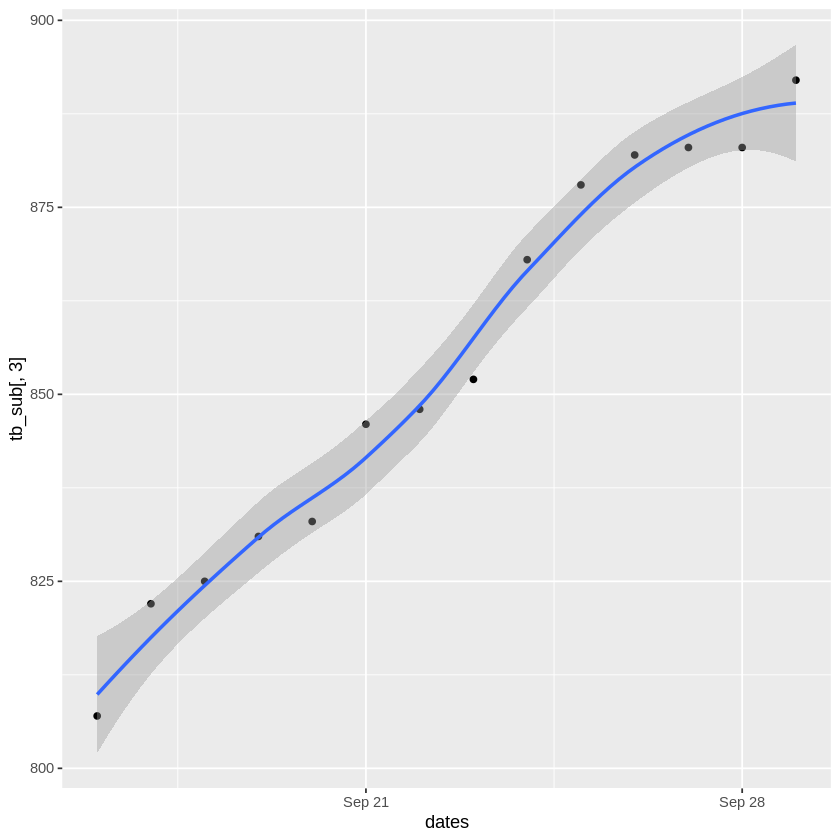

In [ ]:
ggplot(tb_sub, aes( x = dates, y=tb_sub[,3])) + geom_point() + geom_smooth()

## Stopped here on Satuday Dec 19 at 3:30pm after 2 hours of coding. 

# Chapter 3, Let's look a specific county. 
How about Hamilton, TN? This is the county where Chattanooga, TN is located.


### Define the specific county. CHANGE HERE FOR YOUR PROJECT

In [ ]:
#mycountyname = 'King' #Change to your home county for your project
#myState = 'Washington' #Change to your home state for your project
#countyStateUSA = 'King, Washington, US' #Change based on your home county and state


mycountyname = 'San Francisco' #Change to your home county for your project
myState = 'California' #Change to your home state for your project
countyStateUSA = 'San Francisco, California, US' #Change based on your home county and state

mycountyname = 'Hamilton' #Change to your home county for your project
myState = 'Tennessee' #Change to your home state for your project
#countyStateUSA = 'Hamilton, California, US' #Change based on your home county and state




In [ ]:
print(paste("There are ", length(names(tb1)[ grep( mycountyname, colnames(tb1))] ), mycountyname, "counties in the USA"))

[1] "There are  10 Hamilton counties in the USA"


In [ ]:
tail(tb1)

,"Autauga, Alabama, US","Baldwin, Alabama, US","Barbour, Alabama, US","Bibb, Alabama, US","Blount, Alabama, US","Bullock, Alabama, US","Butler, Alabama, US","Calhoun, Alabama, US","Chambers, Alabama, US","Cherokee, Alabama, US",⋯,"Platte, Wyoming, US","Sheridan, Wyoming, US","Sublette, Wyoming, US","Sweetwater, Wyoming, US","Teton, Wyoming, US","Uinta, Wyoming, US","Unassigned, Wyoming, US","Washakie, Wyoming, US","Weston, Wyoming, US",dates
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>
1/5/21,4546,14440,1575,1923,4849,920,1574,9975,2474,1454,⋯,463,2606,614,3061,2216,1597,0,783,479,2021-01-05
1/6/21,4645,14656,1597,1944,4898,925,1583,10109,2519,1468,⋯,470,2621,615,3083,2239,1618,0,789,479,2021-01-06
1/7/21,4705,14845,1614,1981,4957,927,1598,10283,2552,1496,⋯,470,2644,615,3108,2260,1668,0,794,483,2021-01-07
1/8/21,4770,15052,1634,2015,5018,949,1610,10372,2592,1517,⋯,476,2667,618,3153,2346,1693,0,797,485,2021-01-08
1/9/21,4847,15202,1648,2038,5047,950,1625,10453,2620,1523,⋯,476,2669,619,3157,2348,1693,0,800,485,2021-01-09
1/10/21,4879,15327,1658,2051,5066,953,1632,10497,2639,1537,⋯,479,2679,620,3162,2353,1708,0,805,485,2021-01-10


In [ ]:
tb_mycounty <-  tb1 %>% 
   dplyr::select ( countyStateUSA, dates)
tail(tb_mycounty)

ERROR: ignored

In [ ]:
tb_mycounty <- tb_mycounty %>%
   dplyr::filter( between(dates, mdy('4/1/20'), mdy('12/19/20')))
   
tail(tb_mycounty)

In [ ]:
ggplot(tb_mycounty, aes( x = dates, y=tb_mycounty[,1])) + geom_point() + geom_smooth()

# Chapter 4. Look at daily cases

## Define the county and state. Change to your home county and state for your project

In [ ]:
mycounties = c( 'King, Washington, US') #Change here to your home county and state
mycounties = c( 'Hamilton, Tennessee, US') #Change here to your home county and state
mycounties = c( 'San Francisco, California, US') #Change here to your home county and state
mycounties = c( 'Santa Clara, California, US') #Change here to your home county and state


   ## Read the cumulative cases again

In [ ]:
tb = read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv")

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)
#head(tb1)

days_window = 340  # time  window
endday = today(tzone ='EST')

tb_sub <- tb1 %>% 
  dplyr::select( all_of(mycounties), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)

## Covert cumulative counts into daily cases

The diff() function is helpful here. 

### Question: How do we find out the help page for diff()? 

In [ ]:
tb_sub[,1]

In [ ]:
diff( tb_sub[,1])

In [ ]:
local_dailycases = c(0, diff( tb_sub[,1] )) # we add zero to the first day


In [ ]:
tb_daily_sub = data.frame( local_dailycases )
head(tb_daily_sub)

In [ ]:
tb_daily_sub$YMD = mdy(row.names(tb_sub))
head(tb_daily_sub)

In [ ]:
row.names(tb_daily_sub) = tb_daily_sub$YMD #add row names
tail(tb_daily_sub )

In [ ]:
names(tb_daily_sub)[1] = mycounties #add column names

In [ ]:
tail(tb_daily_sub)

## Plot the daily cases

In [ ]:
myplot <- ggplot(tb_daily_sub, aes(x=YMD, y=tb_daily_sub[,1]))
myplot + geom_point() + stat_smooth(span=0.3)

# Chapter 5. Google Mobility analysis


## Background, mobility and social distance

Mobility can gauge the social distance practice

Google Community Mobility report 
https://www.google.com/covid19/mobility/

## Regional mobility

We can download Google community mobility report directly to CoLab

In [ ]:
system("wget https://www.gstatic.com/covid19/mobility/Region_Mobility_Report_CSVs.zip")

We should now see "Region_Mobility_Report_CSV.zip" in /content folder. 

We can unzip this file to get the csv file.

In [ ]:
system("unzip /content/Region_Mobility_Report_CSVs.zip")

We should now see "/content/2020_US_Region_Mobility_Report.csv"

In [ ]:
library(tidyverse)
tbGMUS = read_csv("/content/2020_US_Region_Mobility_Report.csv")
tail(tbGMUS)

In [ ]:
head(tbGMUS)

It seems Google Mobility not updated daily.

## Pick Mobility data from my county. 

### Define the location. CHANGE HERE FOR YOUR PROJECT

In [ ]:
myState = 'Washington'
myCounty = "King County" #Google location is different from JHU


myState = 'California'
myCounty = "San Francisco County" #Google location is different from JHU
myCounty = "Santa Clara County" #Google location is different from JHU

myState = 'Tennessee'
myCounty = "Hamilton County" #Google location is different from JHU


In [ ]:
tbGMmycounty <-
  tbGMUS %>% filter( sub_region_1 == myState )

tbGMmycounty %>% select( sub_region_2) %>% distinct

## Parse the mobility data for the location

In [ ]:
tbGMmycounty <-
  tbGMUS %>% filter( sub_region_1 == myState, sub_region_2 == myCounty)
head(tbGMmycounty)

In [ ]:
tail(tbGMmycounty)

In [ ]:
length(names(tbGMmycounty))

In [ ]:
max(tbGMmycounty$date) #the most recent date of the mobility report

## Merge mobility and covid19 data for our location/county





First, pick the daily case of my county

In [ ]:
head( tb_daily_sub)

In [ ]:
tb_daily_mycounty = tb_daily_sub
names(tb_daily_mycounty) = c("DailyCases", "date")
tail(tb_daily_mycounty)

Now merge the mobility with covid 19


In [ ]:
 tb_GMCovidmycounty = merge(x=tb_daily_mycounty, y=tbGMmycounty, by= 'date', all.y=FALSE)
 row.names(  tb_GMCovidmycounty ) =  tb_GMCovidmycounty$date

In [ ]:
tail( tb_GMCovidmycounty )

In [ ]:
print( paste( "There are ", length(tb_GMCovidmycounty[1,]), "columns"))

### select columns with mobility values

In [ ]:
tb_GMCovidmycounty2  <- tb_GMCovidmycounty  %>% dplyr::select(2, 10:15 ) # select values columns
head(tb_GMCovidmycounty2 )

## Normalize the mobility data for overlay

Use the scale() function for normalization in R.

In [ ]:
tb_GMCovidmycounty_scaled <-  data.frame( scale(tb_GMCovidmycounty2) )
head( tb_GMCovidmycounty_scaled  )

In [ ]:
# add the date column back
tb_GMCovidmycounty_scaled$date = ymd(row.names(tb_GMCovidmycounty_scaled))
tail( tb_GMCovidmycounty_scaled  )

## Overlay mobility and daily cases

In [ ]:
names(tb_GMCovidmycounty_scaled )

In [ ]:
selected_columns = c('DailyCases', 'retail_and_recreation_percent_change_from_baseline', 
'workplaces_percent_change_from_baseline','residential_percent_change_from_baseline')

#selected_columns = c('DailyCases','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline')

df_melt <- melt(tb_GMCovidmycounty_scaled, measure.vars=selected_columns, value.names="Values", varialbe.name="varialbe" )
plot <- ggplot(df_melt, aes(x=date, y=value, color=variable)) + stat_smooth(span=0.15)

plot + ggtitle( paste( myCounty, myState))


# Chapter 6. Does the local weather correlared with Covid19 ?  

### Get weather data from Local airport

See https://rdrr.io/cran/worldmet/man/importNOAA.html 

This installation may take about 10 minutes

In [ ]:
#This ensure worldmet is installed only once and save time.
packages <- c("worldmet")
install.packages(setdiff(packages, rownames(installed.packages()))) 

In [ ]:
library(worldmet)

## Find out the latitude and longitude of the location. CHANGE HERE FOR YOUR PROJECT

We can google for latitude and longitude for a location. 
For example,  "Fairfax county, VA latitude longitude"

The continent USA have Longitute West, and should be negative. 

For example, Lovell, TN is 35.03, -85.2. 

In [ ]:
# 34.0522° N, 118.2437° W for LA, CA
# 47.5480° N, 121.9836° W,  King, WA
# 37.7749° N, 122.4194° W, San Fracicoa, CA
# 35.1619° N, 85.1479° W, Hamilton, TN
# 37.3337° N, 121.8907° W, Santa Clara County, California (San Jose)

#info <- getMeta(lat = 37.3, lon = -121.9) # San Jose, CA
info <- getMeta(lat = 35.03, lon = -85.2) # Lovell, TN
info

Pick the first row

In [ ]:
local_code = paste( info$usaf[1], info$wban[1], sep='-')
local_code

Now, get weather data from NOAA

In [ ]:
weatherLocal <- importNOAA(code = local_code, year = 2020)
tail(weatherLocal)

In [ ]:
names(weatherLocal)

In [ ]:
library(ggplot2)
ggplot(weatherLocal, aes(x=date,y=dew_point)) + geom_line() + stat_smooth(span=0.3)

In [ ]:
ggplot(weatherLocal, aes(x=date,y=air_temp)) + geom_line() + stat_smooth(span=0.3)

Pick air temperature, dew_point, and relative humidity

In [ ]:
weatherLocal2 <- weatherLocal %>% dplyr::select( c('date', 'air_temp', 'dew_point', 'RH'))
head(weatherLocal2)

### Reformate dates

In [ ]:
library(lubridate)

In [ ]:
clean_dates = gsub( " UTC ", "", weatherLocal2$date)
weatherLocal2$YMD = as.Date(clean_dates)
head(weatherLocal2)

Calculate the daily average weather measurement 

In [ ]:
weatherLocal3 <- weatherLocal2 %>% group_by( YMD ) %>% summarise_if( is.numeric, mean, na.rm=TRUE)

tail( weatherLocal3 )

### Merge local weather data with Covid19 data

In [ ]:
tail(tb_GMCovidmycounty2)
tb_GMCovidmycounty2$YMD = ymd( row.names(tb_GMCovidmycounty2) )

In [ ]:
tail(tb_GMCovidmycounty2)

The "merge()" is a uselful command

In [ ]:
tb_local=   merge(x=tb_GMCovidmycounty2, y=weatherLocal3, by= 'YMD', all.y=FALSE)
row.names( tb_local ) = tb_local$YMD
head(tb_local)

In [ ]:
cbind( names( tb_local ), seq(1:length(tb_local[1,])))

In [ ]:
names(tb_local) = c("YMD", "DailyCases", "retail", "grocery", "parks", "transit", "workplace", "residential", "air_temp", "dew_point", "RH")
tail(tb_local)

In [ ]:
startdate = mdy('2/10/2020')
enddate  = today(tzone='EST')
#enddate = mdy('12/25/2020')

tb_local2 <- tb_local %>% 
  #dplyr::select( c(1,2,)) %>%
  dplyr::filter( between(YMD, startdate, enddate))
  
tail( tb_local2 )


### plot cases, mobility, and weather

In [ ]:
tb_local_scaled = data.frame( as.matrix(scale(tb_local2[,2:11])) )
tb_local_scaled$date = tb_local2$YMD

df_tmp <- melt(tb_local_scaled, measure.vars = c("DailyCases", "air_temp", "workplace", "residential" ), value.name = 'Measurements', variable.name = 'Types')
plot <- ggplot(df_tmp, aes(x=date, y=Measurements, color=Types)) + stat_smooth(span=0.15)
plot + ggtitle( paste( myCounty, myState))

ERROR: ignored

In [ ]:
tb_local_scaled = data.frame( as.matrix(tb_local2[,2:11]) )
tb_local_scaled$date = tb_local2$YMD

df_tmp <- melt(tb_local_scaled, measure.vars = c("DailyCases", "air_temp", "workplace", "residential" ), value.name = 'Measurements', variable.name = 'Types')
plot <- ggplot(df_tmp, aes(x=date, y=Measurements, color=Types)) + stat_smooth(span=0.3)
plot + ggtitle( paste( myCounty, myState))

# Chapter 7 (Optional), Explore the USA state-level data

Group by states

## Convert the county-level time series data to state-level data 

In [ ]:
tb0 = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))
#str(tb.jhu) #this is a tibble
head(tb0)

merge all row of the same state by 'group_by'
follow by 'summarize_if'

In [ ]:
tb1 = tb0[, c(7, 50:length(tb[1,])) ]

tb2 <- tb1 %>%
  group_by(Province_State) %>%
  summarize_if(is.numeric, sum,na.rm=TRUE)

head(tb2)

In [ ]:
length( tb2$Province_State )
print( paste("There are ", length( tb2$Province_State ),  " states"))

## Covert cumulative counts into daily cases

### First, do a few tests on simple data sets to make sure that we know what we are doing.

In [ ]:
? apply

In [ ]:
? diff

In [ ]:
x = data.frame(1:10)
x

In [ ]:
apply(x, 2, diff)

In [ ]:
y = data.frame(10:1)
y

In [ ]:
apply(y, 2, diff)

### Now, process a small data set to verify the results

In [ ]:
test = tb2[1:5, 10:20]
test

In [ ]:
apply( test, 1, diff)

### Now, we are comfortable to apply our method to the entire data set. 

In [ ]:
tb3 = apply(tb2[, 2:length(tb2[1,])], 1, diff)
tb3= data.frame(tb3)
head(tb3)

## Add states names as columns names

Current names are not informative

In [ ]:
names(tb3)

Information of States will be more relevant.

In [ ]:
tb2$Province_State

Assign the columns names with the State-names

In [ ]:
names(tb3) = tb2$Province_State
head(tb3)

## Convert date-text to Date type

In [ ]:
row.names(tb3)

In [ ]:
tb3$dates = mdy(row.names(tb3))
head(tb3)

## Plot

In [ ]:
tb3[,2]

### Scatter plot with trend

In [ ]:
ggplot(tb3, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Plot for a time-window

In [ ]:
#end = mdy("5/1/20")
end = today(tzone='EST') - 1
end

In [ ]:
tb_sub <- 
 tb3 %>% filter( dates >= end- ddays(90), dates <  end) #This is 90 day window

ggplot(tb_sub, aes(x=dates, y=Colorado)) + geom_point() + geom_smooth()


### Let's look a specific State. 
How about Tennessee? 

In [ ]:
names(tb3)

In [ ]:
days_window = 90 #90-day window
endday = today(tzone = 'EST')

tb_TN <- tb3 %>% 
  dplyr::select( 'Tennessee', 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday)) 

In [ ]:
head(tb_TN)

In [ ]:
ggplot(tb_TN, aes(x=dates, y=tb_TN[,1])) + geom_point() + geom_smooth()

### Multiple plots to compare two states

In [ ]:
days_window = 90 #90-day window
endday = today(tzone='EST') -1

mystates = c('Tennessee', 'Wisconsin', 'South Dakota')

tb_2States <- tb3 %>% 
  dplyr::select( c(mystates, 'dates') ) %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_2States)

In [ ]:
library(reshape2)

In [ ]:
df_tmp <- melt(tb_2States, measure.vars = mystates)
head(df_tmp)

In [ ]:
names(df_tmp) = c("dates", "State", "DailyCases")
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=DailyCases, color=State)) + geom_point() + stat_smooth(spanc=0.3)

### How about more than two states? 

In [ ]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 90 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)


In [ ]:
df_tmp <- melt(tb_sub, measure.vars = mystates, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=log10(DailyCases), color=State)) + geom_point() + geom_smooth() 

# Chapter 8 (Optional). Transmission analysis

### Study the Germany 1918 example

In [ ]:
install.packages('R0', lib = '/content')
#library('R0')
library("R0", lib.loc="/content")

In [ ]:
help(package='R0')

In [ ]:
#?est.R0.AR
#$example(est.R0.AR)

In [ ]:
data(Germany.1918)
head(Germany.1918)

In [ ]:
str(Germany.1918)

In [ ]:
plot(Germany.1918)

In [ ]:
?est.R0.TD

In [ ]:
example(est.R0.TD)

In [ ]:
mGT <- generation.time("gamma", c(3,1.5))
SB <- est.R0.SB(Germany.1918, mGT, begin=1, end=100)
str(SB)

In [ ]:
plot(SB)

### Estimate Rt to Covid19 for Tennessee

The mean generation time of Covid19 is estimated to 4-5 days. 

In [ ]:
mystates = c('Tennessee','Georgia', 'Alabama', 'Florida')

days_window = 180 #90-day window
endday = today(tzone = 'EST') -1

tb_sub <- tb3 %>% 
  dplyr::select( all_of(mystates), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

head(tb_sub)

In [ ]:
length(tb_sub[,1])

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5)) #model of serial generation time for SARS-CoV-2, (4, 7)
mGT

In [ ]:
TD <- est.R0.TD(tb_sub$Tennessee, mGT, begin=1, end=181, nsim=100)

In [ ]:
#str(TD)
length(tb_sub[,1])

In [ ]:
tb_sub$Rt = TD$R

In [ ]:
ggplot( tb_sub, aes(x=dates, y=Rt) ) +
   geom_point() + 
   stat_smooth( span=0.4)

## How about Hamilton County, TN? 

In [ ]:
install.packages('R0')
library('R0')

In [ ]:
library(tidyverse)
library(lubridate)
tb = read_csv(url("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv"))

tb1 <- tb %>% dplyr::select(12:length(tb[1,])) %>% as.matrix()
tb1 = as.data.frame(t(tb1))

names(tb1) = tb$Combined_Key

current_dates = names(tb)[12:length(tb[1,])]
tb1$dates = mdy(current_dates)

### Select Hamilton, Tennessee, US

In [ ]:
names(tb1) [grep(  "Tennessee", names(tb1))]

In [ ]:
window = 180

tb_sub <-  tb1 %>% 
  dplyr::select ( c('Hamilton, Tennessee, US', 'Davidson, Tennessee, US', 'dates')) %>%
  dplyr::filter( between(dates, today(tzone='EST') - window,  today(tzone ='EST')))

str(tb_sub)

In [ ]:
ggplot(tb_sub, aes(x=dates, y=tb_sub[,1])) + geom_point()

In [ ]:
tail(tb_sub)

### Estiamte daily cases

March 31 Tuesday has 15 cases, but Sunday and Monday has zero cases. 

Hong will try to spead the spike daily counts into previous days with zeros. 

In [ ]:
tb_daily_sub = data.frame( apply(tb_sub[,1:2], 2, diff) )
head(tb_daily_sub, n=15)

In [ ]:
wday(mdy('3/31/20'))

In [ ]:
tb_daily_sub$YMD = mdy(row.names(tb_daily_sub))
head(tb_daily_sub)

In [ ]:
# make sure all daily cases are positive integer or zeros
tb_daily_sub$Hamilton..Tennessee..US[tb_daily_sub$Hamilton..Tennessee..US<0 ] =0
head(tb_daily_sub)
summary(  tb_daily_sub)

In [ ]:
# correct some errors in Hamilton TN 
#tb_daily_sub[c('3/20/20', '3/21/20'), 1] = c(1,1)
#tb_daily_sub[c('3/24/20', '3/25/20'), 1] = c(7, 7)
#tb_daily_sub[c('3/29/20', '3/30/20', '3/30/20'), 1] = c(5, 5, 5)

In [ ]:
tail(tb_daily_sub)

In [ ]:


myplot <- ggplot( tb_daily_sub, aes(x=YMD, y=Hamilton..Tennessee..US)) + geom_point() + stat_smooth(span=0.3) 
myplot + ggtitle("Daily Cases in Hamilton County, TN") +  theme(plot.title = element_text(hjust = 0.5))

### Estimate Rt for Hamilton, TN

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5)) #based on literature reading serial generation time (incubtation time) (4-7), with long distbution
x = tb_daily_sub[,1]
x[x<0]= 0
length(x)
summary(x)
plot(x)

In [ ]:
start = 1
offset = 1
stop = length(x)-offset # Rt estimation need a few day, try 5 days

TD<- est.R0.TD(x, mGT, begin=start, end=stop, nsim=100) 

In [ ]:
#str(TD)

In [ ]:
tb_daily_sub$RtHamilton =  c( TD$R, rep(NA, offset))

In [ ]:
head(tb_daily_sub)

In [ ]:
tail(tb_daily_sub)

In [ ]:
number_of_rows = length(tb_daily_sub[,1 ])
tb_daily_sub$RtHamilton[ 1 : 5] = NA #remove first 5 rows 
tb_daily_sub$RtHamilton[ (number_of_rows-offset-2) :number_of_rows] = NA #remove last few rows

In [ ]:
# add dates
list_of_dates = row.names( tb_daily_sub)
tb_daily_sub$dates = mdy( list_of_dates )

In [ ]:
ggplot(tb_daily_sub, aes(x=dates, y=RtHamilton) ) +
  geom_point() +
  stat_smooth(span=.35) +
  ggtitle("Effective Reproductive Number of Covid19, Hamilton, TN")

For policy and new related to Covid19 at Hamitlon, TN, see http://health.hamiltontn.org/AllServices/Coronavirus(COVID-19)/PressReleases.aspx  <br> 

March 13, first case. <br> 

April 27, governor order restaraunt reopenning. <br> 

July 4th, holiday weekend. If it happended to Hamilton, it might happend to other counties with similar densities? The TN state did show a spike after 4 of July <br> 


In [ ]:
ggplot(tb_daily_sub, aes(x=dates, y= tb_daily_sub[,1] )) +
  geom_point() +
  stat_smooth(span=0.4) +
  ggtitle("Daily confirmed cases at Hamilton, TN")

### Can we remove some noises in Rt? (in progress)

In [ ]:
tb_daily_sub$index = 1: length( tb_daily_sub[,1]) 

loessSpan04 = loess( RtHamilton ~ index, data=tb_daily_sub, span=0.4 )

In [ ]:
plot( predict( loessSpan04))

In [ ]:
#str(loessSpan04)

In [ ]:
plot(loessSpan04$fitted)

# Chapter 9 (Optional) Global Daily cases 

In [ ]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)

In [ ]:
head(gtb[, 5:length(gtb[1,])])

In [ ]:
g_cumulative = data.frame( apply( gtb[,5:length(gtb[1,])], 2, sum ))
str(g_cumulative)
head(g_cumulative)

In [ ]:
g_cummulative2= g_cumulative
g_cummulative2$Dates =  mdy(row.names(g_cummulative2))
names( g_cummulative2 ) = c("Daily_cases", "Dates")
head( g_cummulative2)

In [ ]:
ggplot( g_cummulative2, aes(x=Dates, y=Daily_cases)) + geom_point() + stat_smooth(span=0.3) + ggtitle("Global Cumulative Reported Covid19 Cases") + theme(plot.title=element_text(hjust=0.5))

In [ ]:
g_daily = data.frame(apply(g_cumulative, 2, diff))
g_daily$date = mdy(row.names(g_daily))
names(g_daily) = c("Daily_cases", "Dates")
head(g_daily)

In [ ]:
ggplot( g_daily, aes(x=Dates, y=Daily_cases)) + geom_point() + stat_smooth(span=0.3) + ggtitle("Global Daily Reported Covid19 Cases") + theme(plot.title=element_text(hjust=0.5))

In [ ]:
plot(x)

# Chapter 10 (Optional). Canada Covid19 data analysis

# New Section

### pre-process

In [ ]:
library(tidyverse)
library(lubridate)
# load JHU covid19 data set with tidyverse read_csv
gtb = read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')

head(gtb)

In [ ]:
names(gtb)[1:2] = c("Province", "Country")
head(gtb)

In [ ]:
ctb <- gtb %>% 
 filter( gtb$Country == 'Canada')

head(ctb)

In [ ]:
ctb1 <- ctb %>% dplyr::select(5:length(ctb[1,])) %>% as.matrix()
ctb1 = as.data.frame(t(ctb1))
head(ctb1)

In [ ]:
names(ctb1) = ctb$Province
ctb1 = ctb1[ -c(1:50), ] #remove first 50 rows with very low numbers
head(ctb1)

## Convert cumulative values into daily new cases

In [ ]:
ctb2 = data.frame(apply(ctb1, 2, diff))
head(ctb2)

In [ ]:
current_dates = row.names(ctb2)
ctb2$dates = mdy(current_dates)
head(ctb2)

In [ ]:
#myprovinces = c('Alberta','British.Columbia', 'Ontario')
myprovinces = c('Alberta','Ontario')

days_window = 150 # time window
endday = today(tzone = 'EST') -1

tb_sub <- ctb2 %>% 
  dplyr::select( all_of(myprovinces), 'dates') %>%
  dplyr::filter( between(dates, endday-ddays(days_window), endday))   

tail(tb_sub)

In [ ]:
install.packages('reshape2')
library(reshape2)
df_tmp <- reshape2::melt(tb_sub, measure.vars = myprovinces, value.name = 'DailyCases', variable.name = 'State')
head(df_tmp)

In [ ]:
ggplot(df_tmp, aes(x=dates, y=DailyCases,color=State)) + geom_point() + stat_smooth(span=0.3)

## Estimate Rt

In [ ]:
install.packages('R0')
install.packages('reshape2')

library('R0')

In [ ]:
str(tb_sub)

In [ ]:
mGT<-generation.time("gamma", c(5, 1.5))
tmp = tb_sub[,2] #Ontario
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtOntario = TD$R


In [ ]:
tmp = tb_sub[,1] #Alberta
tmp[tmp<0] = 0
TD <- est.R0.TD(tmp, mGT, begin=1, end=length(tmp)-1+1, nsim=100)
tb_sub$RtAlberta = TD$R


In [ ]:
tail(tb_sub)

In [ ]:
df_tmp <- reshape2::melt(tb_sub[, 3:5], measure.vars = c("RtOntario", "RtAlberta"), value.name = 'Rt', variable.name = 'Rt_by_State')
df_tmp$Rt[ df_tmp$Rt==0] = NA
tail(df_tmp)


In [ ]:
ggplot(df_tmp, aes(x=dates, y=log10(Rt), color=Rt_by_State) ) +
  geom_point() +
  stat_smooth(span=0.3)

# Sandbox

In [ ]:
x <- runif(12,1,1.5)
y <- runif(12,1,1.5)
z <- runif(12,1,1.5)
m <- letters[1:12]
df <- data.frame(x,y,z,m)


In [ ]:
#library(tidyverse)
#install.packages('reshape2')
library(reshape2)
library(ggplot2)
#when you melt essentially you create only one column with the value
#and one column with the variable i.e. your x,y,z 
df <- melt(df, id.vars='m')
head(df)

In [ ]:
ggplot(df, aes(x=variable, y=value, fill=m)) + geom_bar(stat = 'identity')

In [ ]:
#ggplot it. x axis will be m, y will be the value and fill will be
#essentially your x,y,z

ggplot(df, aes(x=m, y=value, fill=variable)) + geom_bar(stat='identity')

## git clone? 

In [ ]:
system("git clone https://github.com/hongqin/Use-R-in-CoLab.git")
system("ls")

In [ ]:
system( "ls /content")

## State Population

In [ ]:
# Note this requires some of the previous snippets to have run to function properly.
# ^ Initial package install & First 2 Sections of Chapter 4 & First 2 Sections of Chapter 7
# First need to find a source of state population data
# https://github.com/CivilServiceUSA/us-states/blob/master/data/states.csv
# Click "raw" to obtain link that will work.
statePopDF = read_csv(url("https://raw.githubusercontent.com/CivilServiceUSA/us-states/master/data/states.csv"))
head(statePopDF)

In [ ]:
# Narrow down df to stuff we might be interested in to make it easier to view.
statePopDF <- statePopDF %>% dplyr::select( c('state', 'population', 'population_rank'))
head(statePopDF)

In [ ]:
# Make a copy of the State-Level DF from above. Rename Province_State to state so headers line up w/ state-level data
stateCasesDF <- tb2
names(stateCasesDF)[names(stateCasesDF) == "Province_State"] <- "state"
head(stateCasesDF)


In [ ]:
# Remove state case data that doesn't exist in state pop data (state pop doesn't include territories)
print("Before Rows")
print(nrow(stateCasesDF))
stateCasesDF <- stateCasesDF[stateCasesDF$state %in% statePopDF$state,]
print("After Rows")
print(nrow(stateCasesDF))

In [ ]:
# Create a new dataframe containing case count / state population by dividing the two dataframes.
mostRecentPercentCases = stateCasesDF[,ncol(stateCasesDF)] / statePopDF[,2]  # note [,ncol(stateCasesDF)] to index at end.
# Give it a name
names(mostRecentPercentCases)[1] <- "percent_cases"
head(mostRecentPercentCases)

In [ ]:
# Merge new percent cases DF with the StatePop one
statePopDF <- cbind(statePopDF, mostRecentPercentCases)
head(statePopDF)

In [ ]:
# Sort descending and display DF
statePopDF %>% arrange(-percent_cases)  # Note the - to make descending

## county population

In [ ]:
popdf = read_csv("https://raw.githubusercontent.com/hongqin/usa-population/main/co-est2019-annres.csv")
head(popdf)

# CDC anxiety sandbox

In [ ]:
library(tidyverse)
library(lubridate)

In [ ]:
#anxietyDf = read_csv("/content/Indicators_of_Anxiety_or_Depression_Based_on_Reported_Frequency_of_Symptoms_During_Last_7_Days.csv")

anxietyDf =read_csv("https://data.cdc.gov/api/views/8pt5-q6wp/rows.csv?accessType=DOWNLOAD")

In [ ]:
anTN <-  anxietyDf %>% filter( State == "Tennessee")

head(anTN)

In [ ]:
head(anTN[,7])

In [ ]:
pickFirstDay = function(x) { 
 strsplit( x, '-')[[1]][1]
}

 #strsplit(anTN[,7],"-")
x = apply( anTN[, 7], 1, pickFirstDay)
mdy( paste( x, ", 2020"))

anTN$FirstDay = mdy( paste( x, ", 2020"))

In [ ]:
head( anTN )